# Parte 1


In [62]:
# import matplot lib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from openpyxl import Workbook


# openpyxl

## Leer datos de exel


In [40]:
df = None  # Definir variable del exel

# Pedirle nombre del exel al usuario y cargarlo
while False:
    try:
        exel = input("Nombre del archivo de exel (data.xlsx)")
        df = pd.read_excel(exel)
        break
    except:
        print("Nombre invalido ")


df = pd.read_excel("data.xlsx")


# Leer puntos del exel
x = df["x"].values
y = df["y"].values

## Usando polyfit()


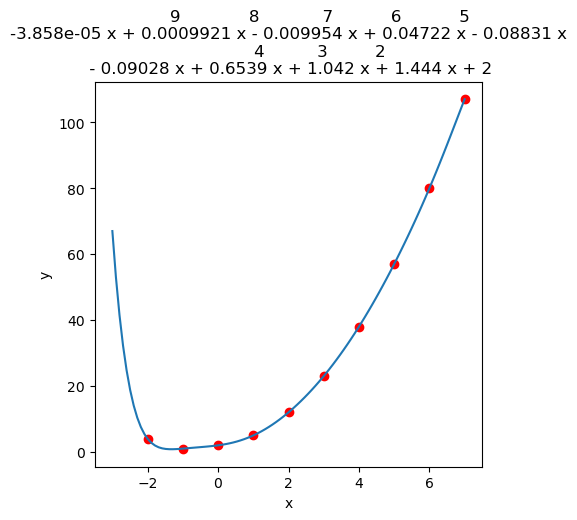

In [74]:
INTERVAL = np.linspace(-3, 7, 100)

# Calcular el polinomio de Lagrange con la funcion polyfit
p = np.polyfit(x, y, deg=len(x) - 1)

# Crear plot
fig, ax = plt.subplots(figsize=(5, 5))

# Configuracion de plot
ax.set(title=np.poly1d(p), xlabel="x", ylabel="y")

# Plotear puntos de exel
ax.scatter(x, y, c="r")

# Plotear puntos con el polinomio de Lagrange
ax.plot(
    INTERVAL,
    np.polyval(p, INTERVAL),
)

## De manera procedimental


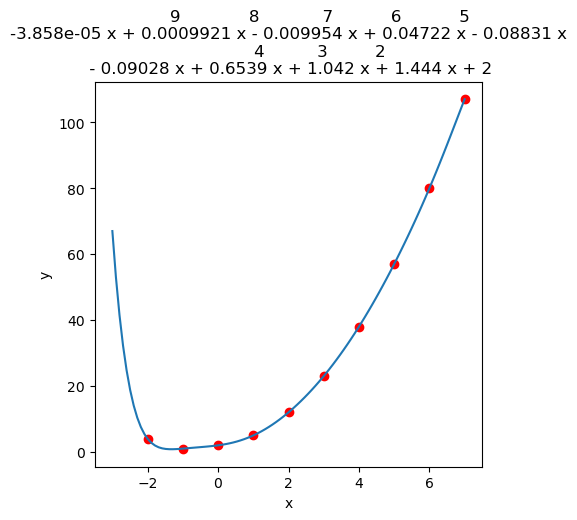

In [75]:
def lagrange(eval):
    n = len(x)
    result = 0

    for i in range(n):
        term = y[i]
        for j in range(n):
            if j != i:
                term = term * (eval - x[j]) / (x[i] - x[j])

        result += term

    return result


# Crear plot
fig, ax = plt.subplots(figsize=(5, 5))

# Configuracion de plot
ax.set(title=np.poly1d(p), xlabel="x", ylabel="y")

# Plotear puntos de exel
ax.scatter(x, y, c="r")

# Plotear puntos con el polinomio de Lagrange
ax.plot(
    INTERVAL,
    list(
        map(lagrange, INTERVAL),
    ),
)

## Salvar resultados a exel


In [77]:
# Guardar los resultados en el archivo de Excel

wb = Workbook()
ws = wb.active

ws["A1"] = "x"
ws["B1"] = "y"
ws["C1"] = "Polinomio de Lagrange"

for i in range(len(INTERVAL)):
    ws.cell(row=i + 2, column=1, value=INTERVAL[i])
    ws.cell(
        row=i + 2,
        column=2,
        value=list(map(lagrange, INTERVAL))[i],
    )

wb.save("test.xlsx")